## Electron Invariant Mass Prediction

### Variables:

* Run: The run number of the event.
* Event: The event number.
* E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
* px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).
* pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
* eta1, eta2: The pseudorapidity of the electron 1 and 2.
* phi1, phi2: The phi angle of the electron 1 and 2 (rad).
* Q1, Q2: The charge of the electron 1 and 2.
* M: The invariant mass of two electrons (GeV).

### Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from scipy.stats import zscore
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from warnings import filterwarnings

In [3]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

### Feature Engineering

In [4]:
df = pd.read_csv("dielectron.csv")
data = df.copy()
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [5]:
data.rename(columns={'px1 ':'px1'}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [7]:
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771173,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738102,-1.892288,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061179,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [8]:
data.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [9]:
data['M'] = data['M'].fillna(data['M'].mean())

In [10]:
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.245111
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771173,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738102,-1.892288,-1.556925,-1.000000,12.453575
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061179,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.303850
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,38.992250
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


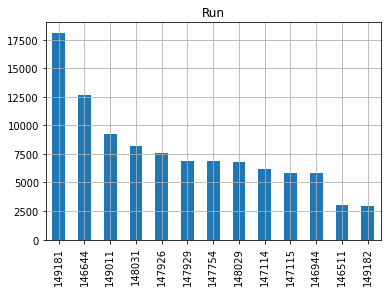

In [11]:
data.Run.value_counts().plot(kind='bar')
plt.grid()
plt.title('Run')
plt.show()

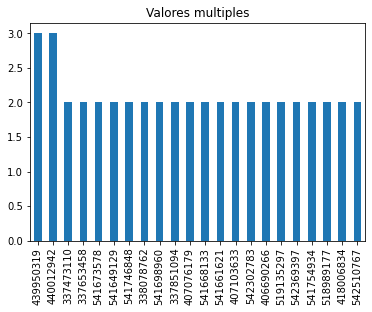

In [12]:
multis = data.Event.value_counts() 
multis = multis[multis.values>1] 
multis.plot(kind='bar')
plt.title('Valores multiples')
plt.show()

In [13]:
multis_ids = multis.index.to_list()
data[data.Event.isin(multis_ids)].sort_values('Event')

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


In [14]:
data[data.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [15]:
data.loc[79612,'Event'] = 418006835 
multis_ids.remove(418006834)
data[data.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.2745,9.36951,-1.31941,0.910934,1,61.6136,23.1457,5.76582,-56.8091,23.853,-1.60235,0.244141,1,10.6654


In [16]:
data = data.drop_duplicates(subset='Event')
multis = data.Event.value_counts() 
multis = multis[multis.values>1] 
multis

Series([], Name: Event, dtype: int64)

In [17]:
data = data.drop(["Run", "Event"], axis = 1)
data


,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


### Data Analysis 

<AxesSubplot:xlabel='M', ylabel='Count'>

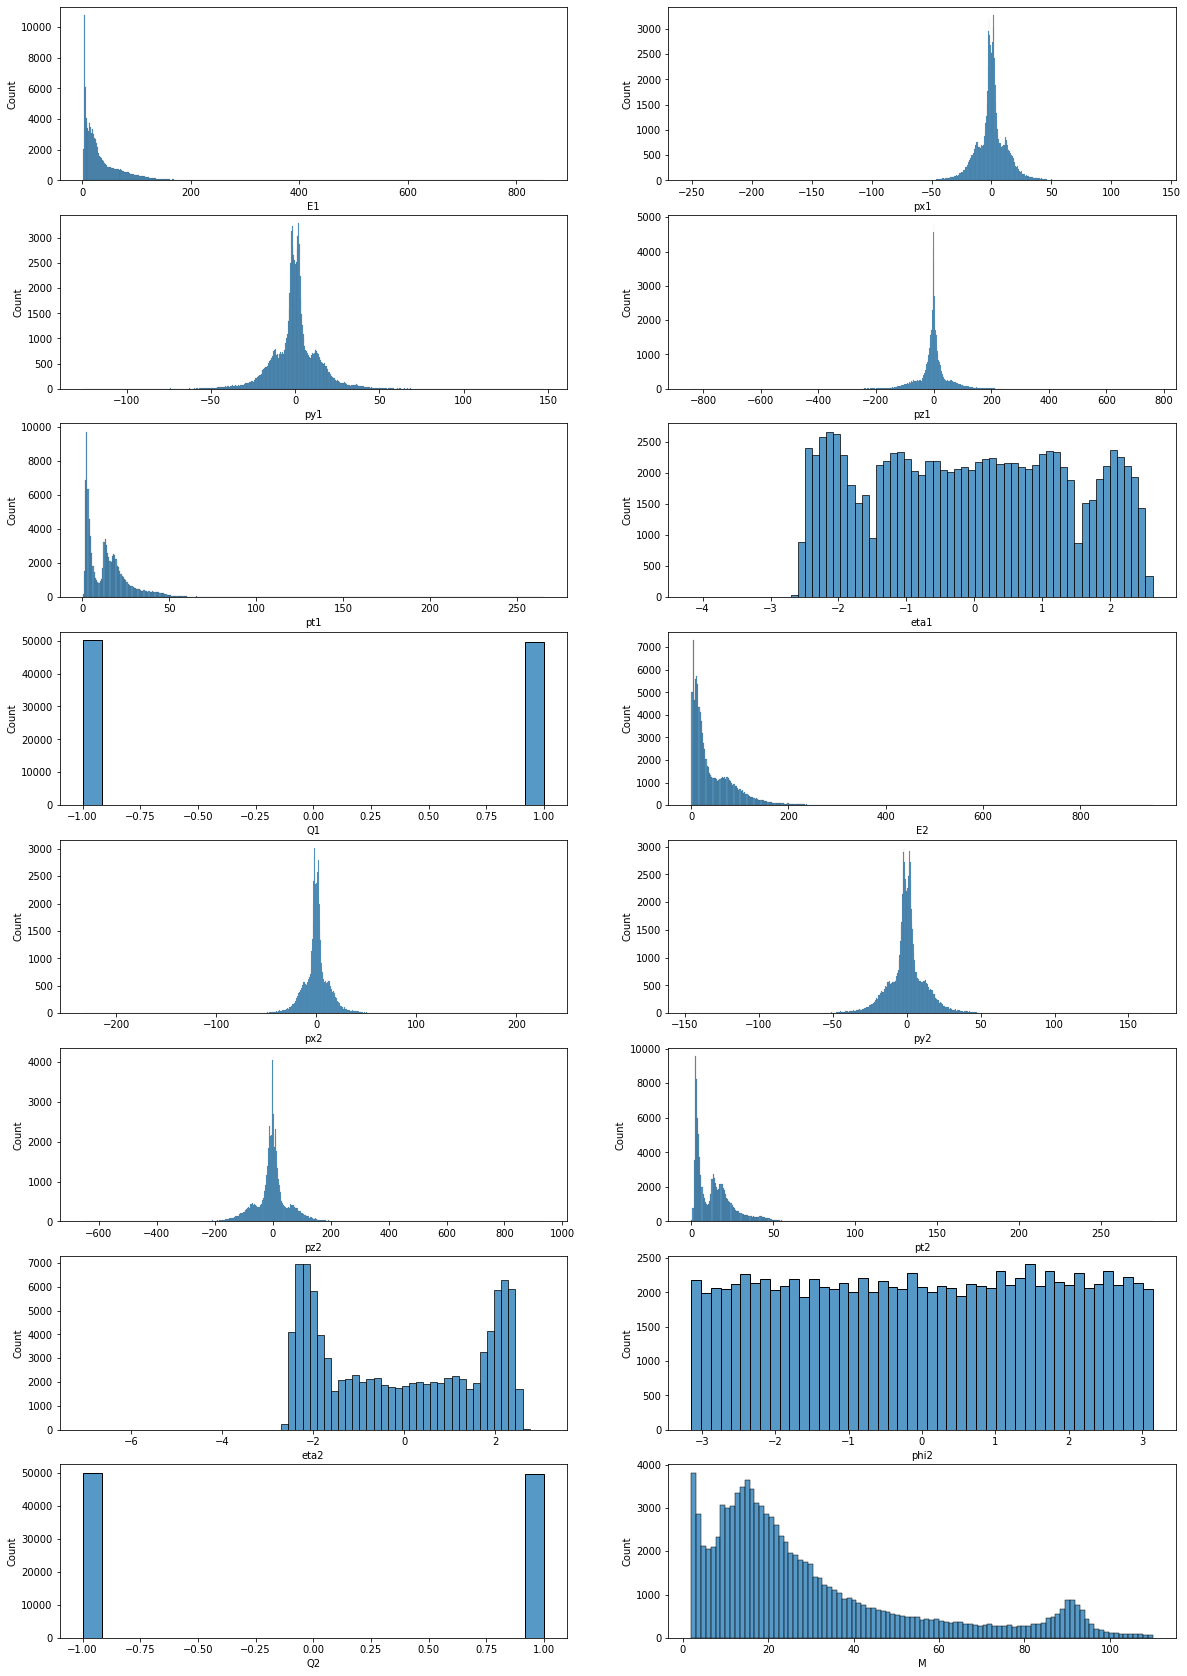

In [18]:
fig, axarr = plt.subplots(8, 2, figsize=(20, 30))
sns.histplot(data = data, x = "E1",  ax=axarr[0][0])
sns.histplot(data = data, x = "px1", ax=axarr[0][1])
sns.histplot(data = data, x = "py1", ax=axarr[1][0])
sns.histplot(data = data, x = "pz1", ax=axarr[1][1])
sns.histplot(data = data, x = "pt1", ax=axarr[2][0])
sns.histplot(data = data, x = "eta1",ax=axarr[2][1])
sns.histplot(data = data, x = "Q1",  ax=axarr[3][0])
sns.histplot(data = data, x = "E2",  ax=axarr[3][1])
sns.histplot(data = data, x = "px2", ax=axarr[4][0])
sns.histplot(data = data, x = "py2", ax=axarr[4][1])
sns.histplot(data = data, x = "pz2", ax=axarr[5][0])
sns.histplot(data = data, x = "pt2", ax=axarr[5][1])
sns.histplot(data = data, x = "eta2",ax=axarr[6][0])
sns.histplot(data = data, x = "phi2",ax=axarr[6][1])
sns.histplot(data = data, x = "Q2",  ax=axarr[7][0])
sns.histplot(data = data, x = "M",   ax=axarr[7][1])

#### Regression 

<AxesSubplot:xlabel='Q2', ylabel='M'>

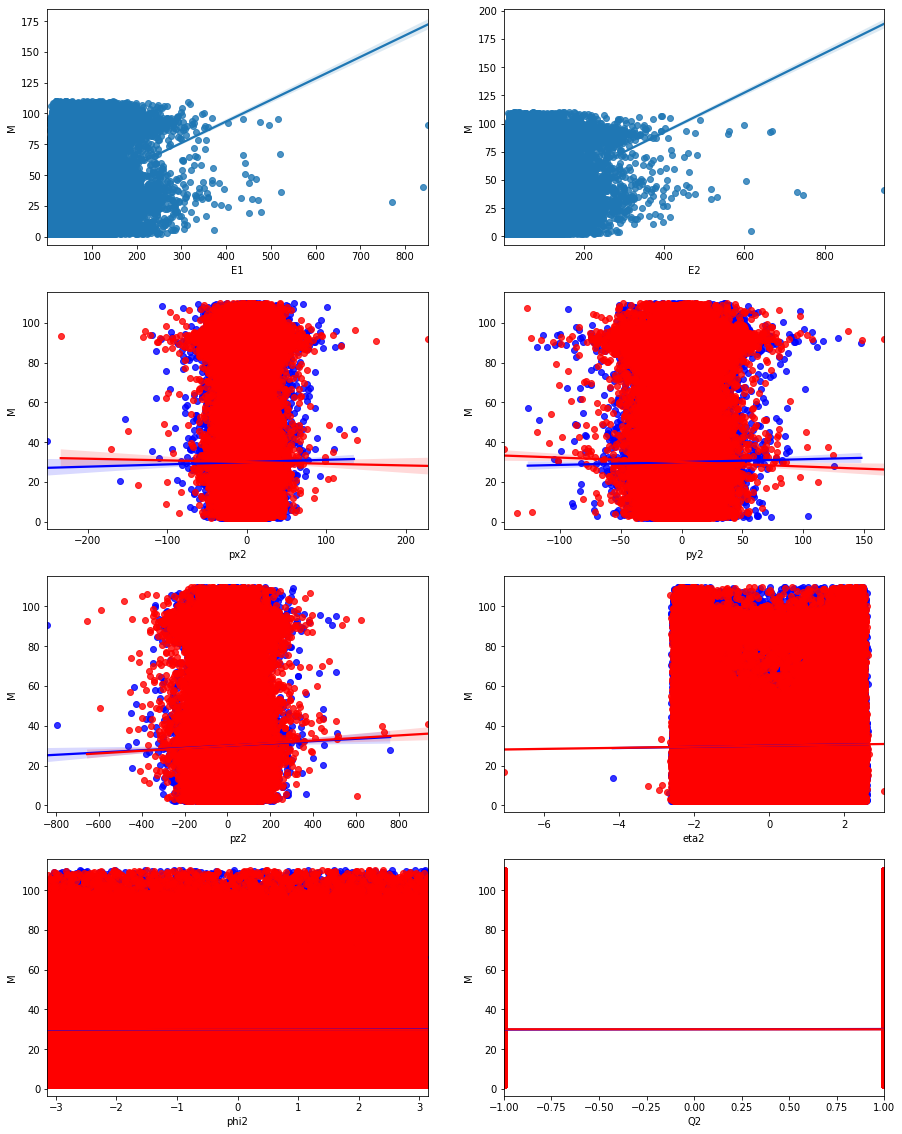

In [19]:
fig2, axirr = plt.subplots(4, 2, figsize=(15, 20), squeeze = False)
sns.regplot(data['E1'],data['M'], ax=axirr[0][0])
sns.regplot(data['E2'],data['M'], ax=axirr[0][1])
sns.regplot(data['px1'],data['M'],color = 'blue', ax=axirr[1][0])
sns.regplot(data['px2'],data['M'],color = 'red', ax=axirr[1][0])
sns.regplot(data['py1'],data['M'],color = 'blue', ax=axirr[1][1])
sns.regplot(data['py2'],data['M'],color = 'red', ax=axirr[1][1])
sns.regplot(data['pz1'],data['M'],color = 'blue', ax=axirr[2][0])
sns.regplot(data['pz2'],data['M'],color = 'red', ax=axirr[2][0])
sns.regplot(data['eta1'],data['M'],color = 'blue', ax=axirr[2][1])
sns.regplot(data['eta2'],data['M'],color = 'red', ax=axirr[2][1])
sns.regplot(data['phi1'],data['M'],color = 'blue', ax=axirr[3][0])
sns.regplot(data['phi2'],data['M'],color = 'red', ax=axirr[3][0])
sns.regplot(data['Q1'],data['M'],color = 'blue', ax=axirr[3][1])
sns.regplot(data['Q2'],data['M'],color = 'red', ax=axirr[3][1])

#### Outliers 

Text(0.5, 1.0, 'Q1 & Q2')

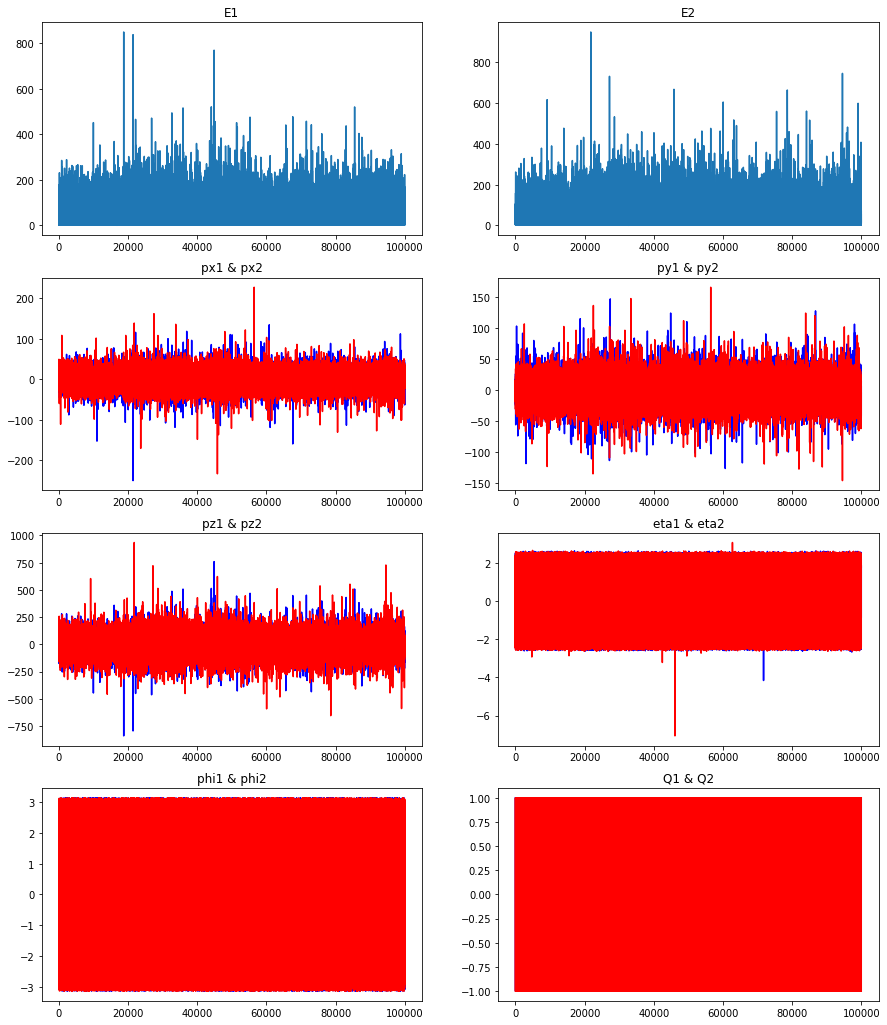

In [20]:
fig3, axorr = plt.subplots(4, 2, figsize=(15, 18), squeeze = False)
axorr[0][0].plot(data['E1'])
axorr[0][1].plot(data['E2'])
axorr[1][0].plot(data['px1'],color = 'blue')
axorr[1][0].plot(data['px2'],color = 'red')
axorr[1][1].plot(data['py1'],color = 'blue')
axorr[1][1].plot(data['py2'],color = 'red')
axorr[2][0].plot(data['pz1'],color = 'blue')
axorr[2][0].plot(data['pz2'],color = 'red')
axorr[2][1].plot(data['eta1'],color = 'blue')
axorr[2][1].plot(data['eta2'],color = 'red')
axorr[3][0].plot(data['phi1'],color = 'blue')
axorr[3][0].plot(data['phi2'],color = 'red')
axorr[3][1].plot(data['Q1'],color = 'blue')
axorr[3][1].plot(data['Q2'],color = 'red')
axorr[0][0].set_title('E1')
axorr[0][1].set_title('E2')
axorr[1][0].set_title('px1 & px2')
axorr[1][1].set_title('py1 & py2')
axorr[2][0].set_title('pz1 & pz2')
axorr[2][1].set_title('eta1 & eta2')
axorr[3][0].set_title('phi1 & phi2')
axorr[3][1].set_title('Q1 & Q2')



In [21]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]
data.count()

E1      92582
px1     92582
py1     92582
pz1     92582
pt1     92582
eta1    92582
phi1    92582
Q1      92582
E2      92582
px2     92582
py2     92582
pz2     92582
pt2     92582
eta2    92582
phi2    92582
Q2      92582
M       92582
dtype: int64

Text(0.5, 1.0, 'Q1 & Q2')

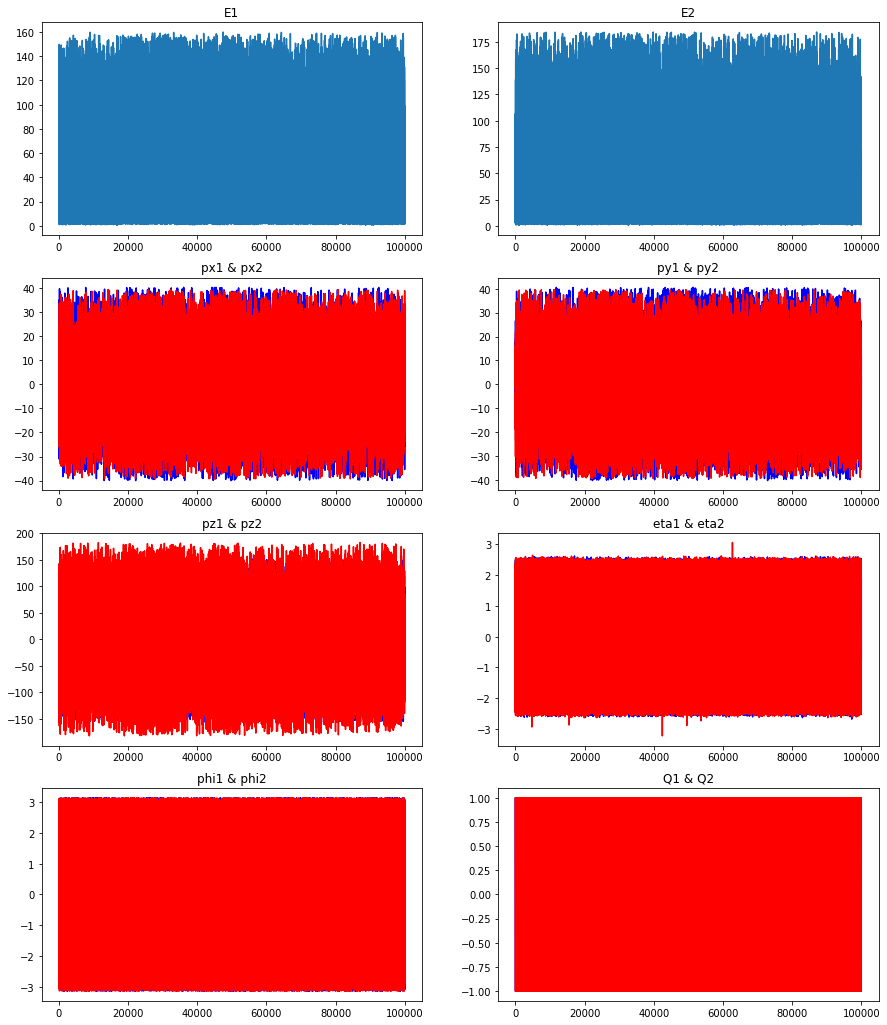

In [22]:

fig3, axorr = plt.subplots(4, 2, figsize=(15, 18), squeeze = False)
axorr[0][0].plot(data['E1'])
axorr[0][1].plot(data['E2'])
axorr[1][0].plot(data['px1'],color = 'blue')
axorr[1][0].plot(data['px2'],color = 'red')
axorr[1][1].plot(data['py1'],color = 'blue')
axorr[1][1].plot(data['py2'],color = 'red')
axorr[2][0].plot(data['pz1'],color = 'blue')
axorr[2][0].plot(data['pz2'],color = 'red')
axorr[2][1].plot(data['eta1'],color = 'blue')
axorr[2][1].plot(data['eta2'],color = 'red')
axorr[3][0].plot(data['phi1'],color = 'blue')
axorr[3][0].plot(data['phi2'],color = 'red')
axorr[3][1].plot(data['Q1'],color = 'blue')
axorr[3][1].plot(data['Q2'],color = 'red')
axorr[0][0].set_title('E1')
axorr[0][1].set_title('E2')
axorr[1][0].set_title('px1 & px2')
axorr[1][1].set_title('py1 & py2')
axorr[2][0].set_title('pz1 & pz2')
axorr[2][1].set_title('eta1 & eta2')
axorr[3][0].set_title('phi1 & phi2')
axorr[3][1].set_title('Q1 & Q2')

#### Correlation 

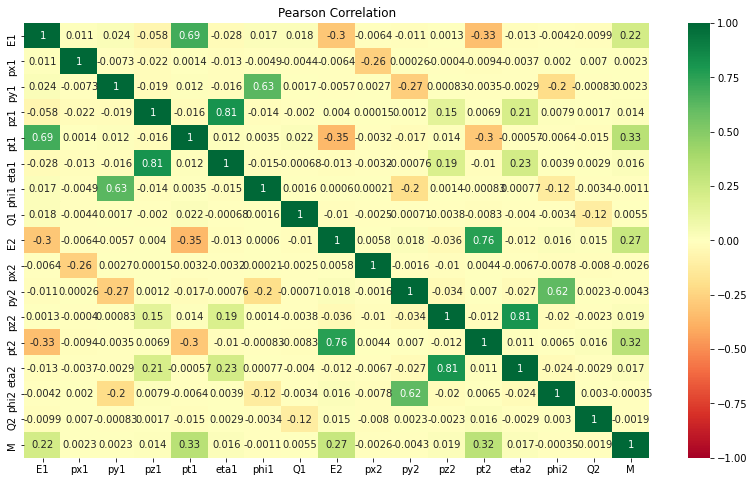

In [23]:
corr_pearson = data.corr(method = 'pearson')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

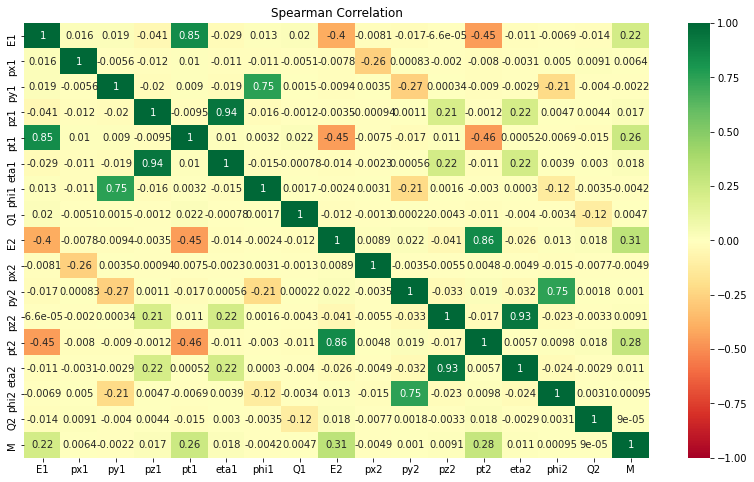

In [24]:
corr_spearman = data.corr(method = 'spearman')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Spearman Correlation')
plt.show()

#### Covariance

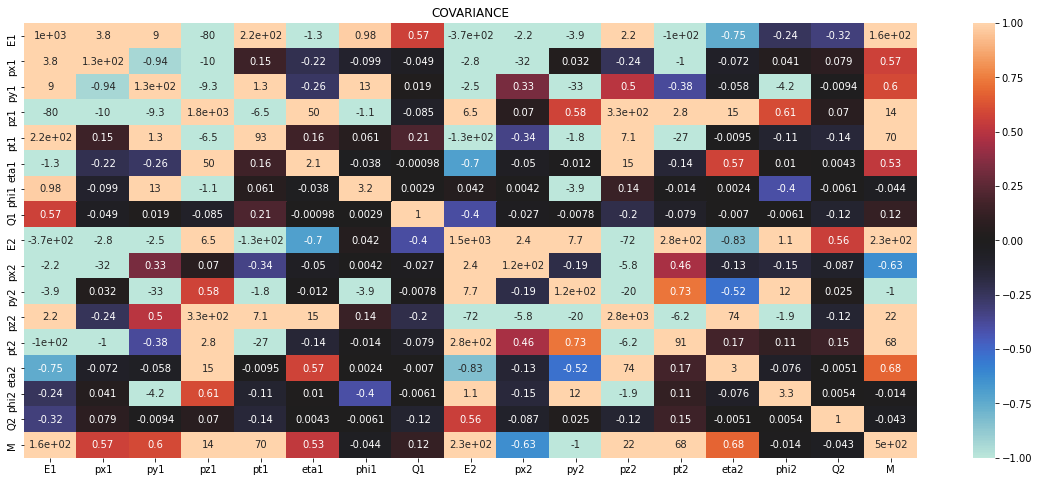

In [25]:
covv = data.cov()
figure = plt.figure(figsize=(20,8))
sns.heatmap(covv,annot=True,vmin=-1,center=0,vmax=1)
plt.title("COVARIANCE")
plt.show()

#### Model implementation 

In [26]:
x = data.drop("M",axis=1)
y = data["M"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
lm = LinearRegression().fit(xTrain,yTrain)
pls = PLSRegression().fit(xTrain,yTrain)
lasso = Lasso().fit(xTrain,yTrain)
elasticnet = ElasticNet().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)
xgbr = XGBRegressor().fit(xTrain,yTrain)
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

In [28]:
models = [lm,pls,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,lgbmr,catbr,xgbr]

In [29]:
def model_evaluate(model):
    acc=model.score(xTest,yTest)
    print("Accuracy: " + str(int(acc*100)) + '%')

In [35]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    mis = np.sqrt(error)
    print(name + ": ")
    print("-" * 18)
    model_evaluate(model)
    print("R2 error: " + str(int(R2CV*100)) + '%')
    print("Negative mean squared error: " + '{:.3f}'.format(mis))
    print("-" * 35)

LinearRegression: 
------------------
Accuracy: 33%
R2 error: 32%
Negative mean squared error: 18.321
-----------------------------------
PLSRegression: 
------------------
Accuracy: 32%
R2 error: 32%
Negative mean squared error: 18.412
-----------------------------------
Lasso: 
------------------
Accuracy: 33%
R2 error: 33%
Negative mean squared error: 18.313
-----------------------------------
ElasticNet: 
------------------
Accuracy: 33%
R2 error: 33%
Negative mean squared error: 18.314
-----------------------------------
KNeighborsRegressor: 
------------------
Accuracy: 94%
R2 error: 89%
Negative mean squared error: 7.236
-----------------------------------
DecisionTreeRegressor: 
------------------
Accuracy: 74%
R2 error: 63%
Negative mean squared error: 13.477
-----------------------------------
BaggingRegressor: 
------------------
Accuracy: 88%
R2 error: 85%
Negative mean squared error: 8.615
-----------------------------------
RandomForestRegressor: 
------------------
Accur

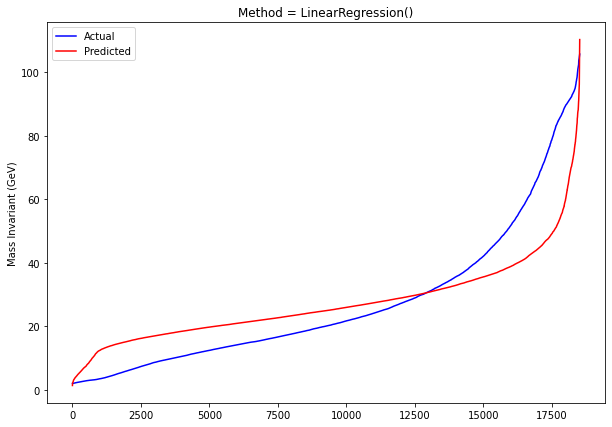

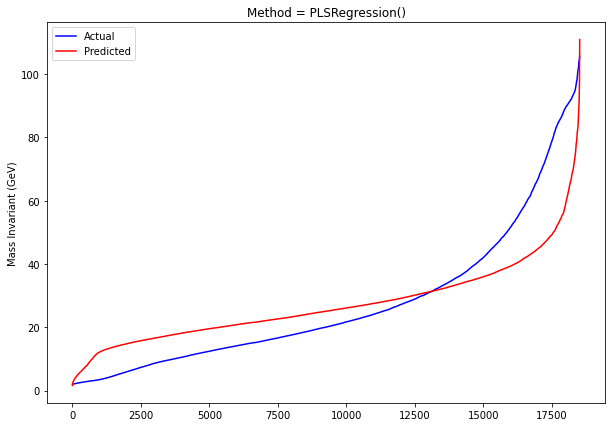

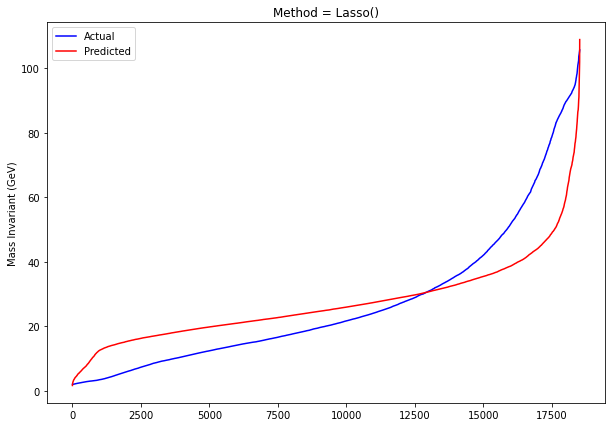

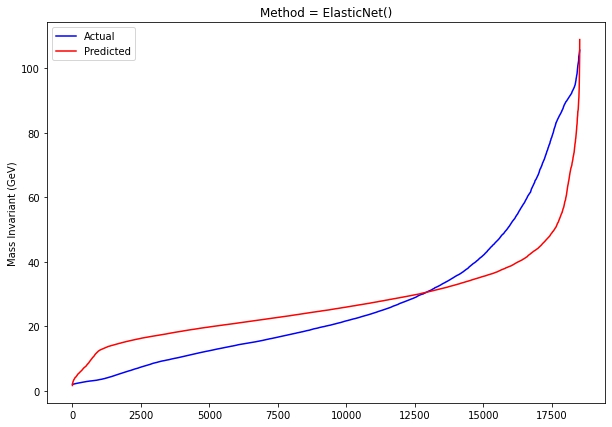

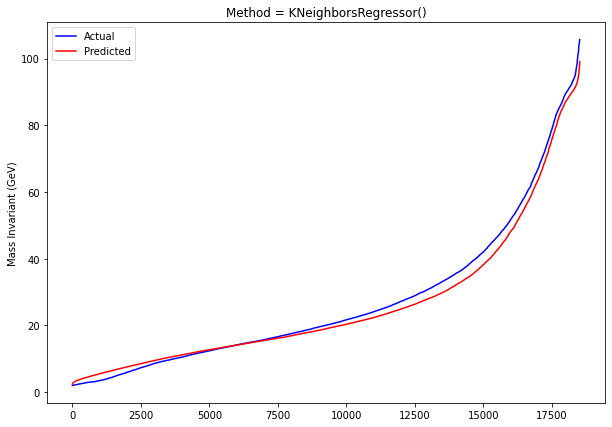

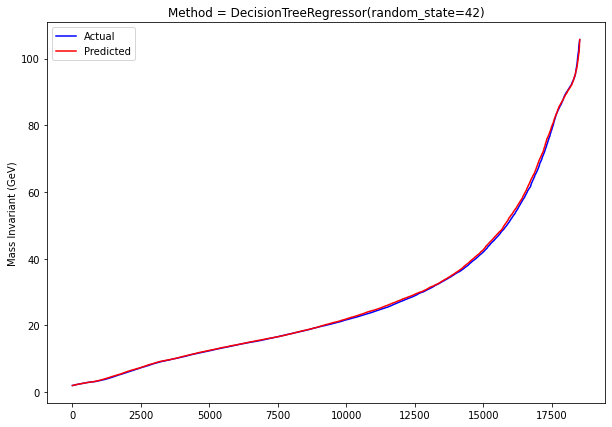

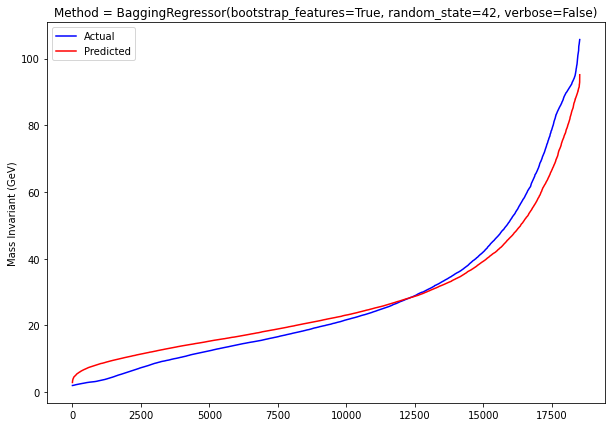

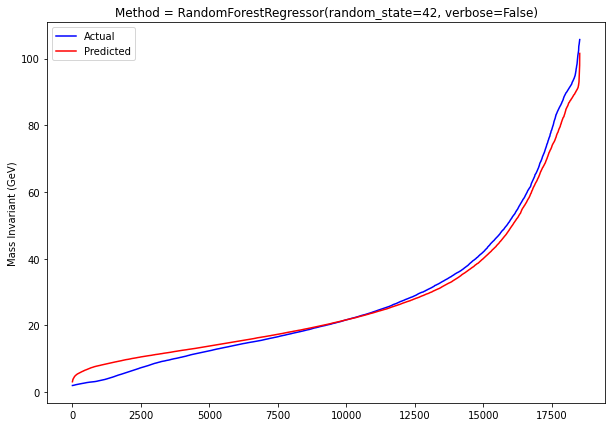

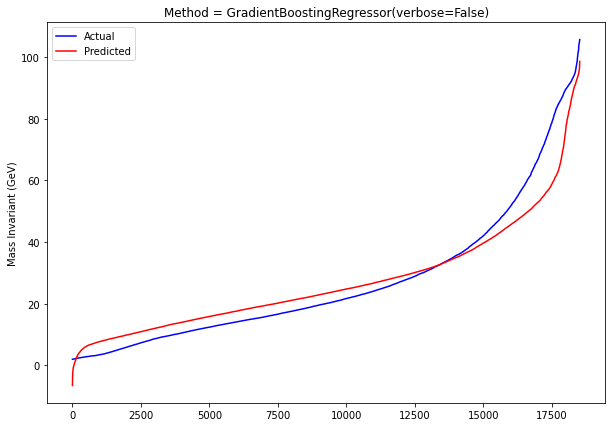

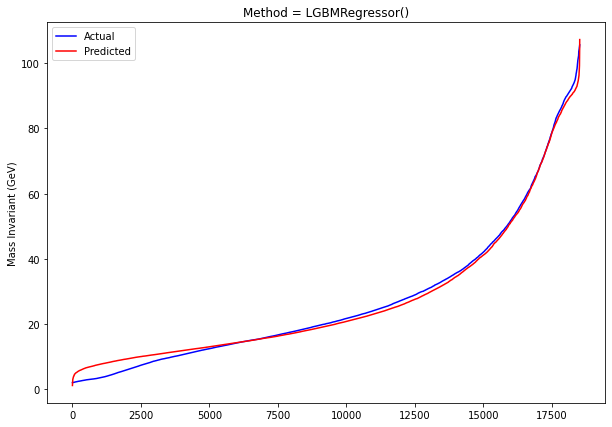

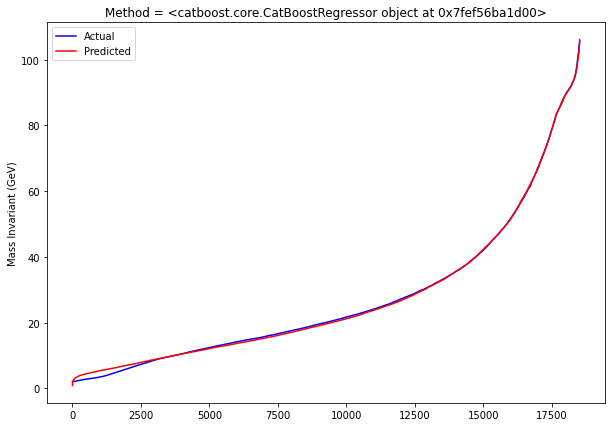

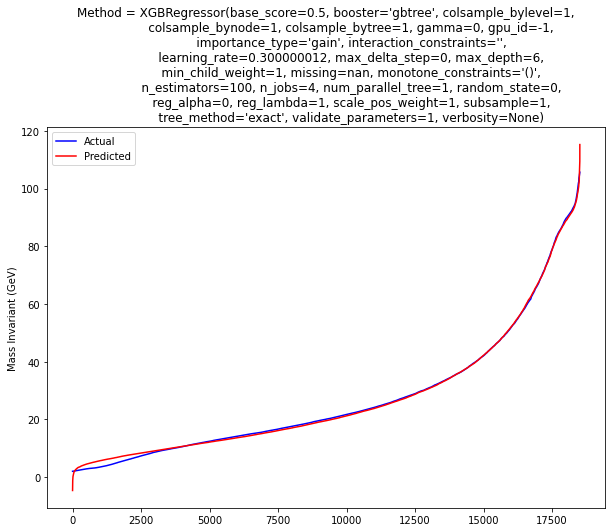

In [36]:
for pred in models:
    Y_pred = pred.predict(xTest)
    fig = plt.figure(figsize=(10,7))

    plt.plot(np.arange(0,len(yTest)),sorted(yTest), c='b', label='Actual')
    plt.plot(np.arange(0,len(yTest)),sorted(Y_pred), c='r', label='Predicted')

    plt.title(
             f'Method = {pred}')
    plt.ylabel('Mass Invariant (GeV)')
    plt.legend(loc='best')

    plt.show()